In [29]:
from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [14]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ambon id
ust-kamchatsk ru
nikolskoye ru
bredasdorp za
puri in
te anau nz
bambous virieux mu
tuktoyaktuk ca
arraial do cabo br
marsa matruh eg
victoria sc
platonovka ru
yellowknife ca
mataura pf
mataura pf
hobart au
lipin bor ru
mataura pf
cayenne gf
chuy uy
bathsheba bb
sentyabrskiy ru
upernavik gl
cape town za
illoqqortoormiut gl
samusu ws
sentyabrskiy ru
vaini to
bluff nz
lebrija co
hobart au
iqaluit ca
east london za
ushuaia ar
rikitea pf
ponta do sol cv
barentsburg sj
kieta pg
belen py
khatanga ru
vaitupu wf
lavrentiya ru
hobyo so
arraial do cabo br
mehamn no
ushuaia ar
cidreira br
lubu cn
atuona pf
mar del plata ar
bluff nz
upernavik gl
punta arenas cl
rikitea pf
mahebourg mu
luderitz na
manta ec
lima pe
tuktoyaktuk ca
blagoyevo ru
whyalla au
tayga ru
tidore id
manta ec
pontianak id
albany au
yellowknife ca
new norfolk au
victoria sc
ludvika se
kendari id
hilo us
vostok ru
sept-iles ca
vaini to
gat ly
vao nc
ostrovnoy ru
illoqqortoormiut gl
illoqqortoormiut gl
kodiak us
east londo

longyearbyen sj
mataura pf
taolanaro mg
viedma ar
lompoc us
kolda sn
faanui pf
attawapiskat ca
mackay au
rocha uy
albany au
marsh harbour bs
nanortalik gl
port macquarie au
nizhneyansk ru
fukue jp
labuhan id
aleksandrov gay ru
aklavik ca
airai pw
jarjis tn
kruisfontein za
cape town za
nizhneyansk ru
jamestown sh
punta arenas cl
port elizabeth za
albany au
albany au
hermanus za
mataura pf
hermanus za
chernyshevskiy ru
talnakh ru
tasiilaq gl
rikitea pf
pisco pe
ust-barguzin ru
kununurra au
hilo us
yellowknife ca
berlevag no
samusu ws
kaitangata nz
port augusta au
hilo us
melekhovskaya ru
koutiala ml
amderma ru
kolyshley ru
saint george bm
fare pf
palabuhanratu id
punta arenas cl
buraydah sa
rawlins us
lompoc us
zhezkazgan kz
bredasdorp za
punta arenas cl
quatre cocos mu
lafia ng
vaini to
valsad in
albany au
mataura pf
yunjinghong cn
salihorsk by
rikitea pf
butaritari ki
jamestown sh
barrow us
zabol ir
rikitea pf
santa rosalia mx
east london za
boda cf
rikitea pf
guerrero negro mx
ginir e

punta arenas cl
rikitea pf
pacasmayo pe
kruisfontein za
grand river south east mu
ushuaia ar
shubarkuduk kz
punta arenas cl
amurzet ru
tautira pf
udachnyy ru
sentyabrskiy ru
pontianak id
jamestown sh
cape town za
barrow us
port hardy ca
katsuura jp
ushuaia ar
saldanha za
hualmay pe
ulladulla au
georgetown sh
hervey bay au
mahebourg mu
kodiak us
saint-philippe re
kodiak us
barrow us
illoqqortoormiut gl
busselton au
albany au
cape town za
kruisfontein za
tokur ru
lomovka ru
lasa cn
leh in
murray us
camalu mx
benito juarez mx
yellowknife ca
lompoc us
ushuaia ar
ballina au
lompoc us
kodiak us
piacabucu br
honningsvag no
port-gentil ga
taltal cl
emerald au
norman wells ca
port elizabeth za
cabo san lucas mx
qui nhon vn
provideniya ru
pekalongan id
port elizabeth za
padang id
new norfolk au
kapaa us


In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [17]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S') 

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
              


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ambon
Processing Record 2 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | puri
Processing Record 6 of Set 1 | te anau
Processing Record 7 of Set 1 | bambous virieux
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | marsa matruh
Processing Record 11 of Set 1 | victoria
Processing Record 12 of Set 1 | platonovka
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | lipin bor
Processing Record 17 of Set 1 | cayenne
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | bathsheba
Processing Record 20 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 21 of Set 1 | upernavik
Proces

Processing Record 39 of Set 4 | cherskiy
Processing Record 40 of Set 4 | ascension
Processing Record 41 of Set 4 | maxixe
Processing Record 42 of Set 4 | santa isabel do rio negro
Processing Record 43 of Set 4 | poum
Processing Record 44 of Set 4 | sitka
Processing Record 45 of Set 4 | hongjiang
Processing Record 46 of Set 4 | bur gabo
City not found. Skipping...
Processing Record 47 of Set 4 | tasiilaq
Processing Record 48 of Set 4 | zandvoort
Processing Record 49 of Set 4 | nouadhibou
Processing Record 50 of Set 4 | inhambane
Processing Record 1 of Set 5 | lompoc
Processing Record 2 of Set 5 | haines junction
Processing Record 3 of Set 5 | paamiut
Processing Record 4 of Set 5 | egvekinot
Processing Record 5 of Set 5 | azul
Processing Record 6 of Set 5 | teknaf
Processing Record 7 of Set 5 | laiagam
City not found. Skipping...
Processing Record 8 of Set 5 | nishihara
Processing Record 9 of Set 5 | yerbogachen
Processing Record 10 of Set 5 | northam
Processing Record 11 of Set 5 | rutl

Processing Record 28 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 29 of Set 8 | buraydah
Processing Record 30 of Set 8 | rawlins
Processing Record 31 of Set 8 | zhezkazgan
Processing Record 32 of Set 8 | quatre cocos
Processing Record 33 of Set 8 | lafia
Processing Record 34 of Set 8 | valsad
Processing Record 35 of Set 8 | yunjinghong
City not found. Skipping...
Processing Record 36 of Set 8 | salihorsk
Processing Record 37 of Set 8 | zabol
Processing Record 38 of Set 8 | santa rosalia
Processing Record 39 of Set 8 | boda
Processing Record 40 of Set 8 | ginir
Processing Record 41 of Set 8 | chimbote
Processing Record 42 of Set 8 | berbera
Processing Record 43 of Set 8 | avera
Processing Record 44 of Set 8 | amga
Processing Record 45 of Set 8 | luanda
Processing Record 46 of Set 8 | hamilton
Processing Record 47 of Set 8 | diban
Processing Record 48 of Set 8 | esperance
Processing Record 49 of Set 8 | suhbaatar
Processing Record 50 of Set 8 | caravelas
Process

Processing Record 15 of Set 12 | kutum
Processing Record 16 of Set 12 | kamina
Processing Record 17 of Set 12 | tsienyane
City not found. Skipping...
Processing Record 18 of Set 12 | zhicheng
Processing Record 19 of Set 12 | the pas
Processing Record 20 of Set 12 | muisne
Processing Record 21 of Set 12 | segovia
Processing Record 22 of Set 12 | nampula
Processing Record 23 of Set 12 | kvitok
Processing Record 24 of Set 12 | hovd
Processing Record 25 of Set 12 | boshnyakovo
Processing Record 26 of Set 12 | maumere
Processing Record 27 of Set 12 | bonga
Processing Record 28 of Set 12 | khonuu
City not found. Skipping...
Processing Record 29 of Set 12 | inderborskiy
City not found. Skipping...
Processing Record 30 of Set 12 | baie-saint-paul
Processing Record 31 of Set 12 | malpe
Processing Record 32 of Set 12 | porosozero
Processing Record 33 of Set 12 | sao jose da coroa grande
Processing Record 34 of Set 12 | roald
Processing Record 35 of Set 12 | montebello
Processing Record 36 of Set

In [18]:
len(cities)


609

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ambon,-3.6954,128.1814,75.34,94,40,5.75,ID,2022-07-12 00:09:43
1,Nikolskoye,59.7035,30.7861,64.29,98,100,7.65,RU,2022-07-12 00:09:43
2,Bredasdorp,-34.5322,20.0403,48.78,83,1,5.91,ZA,2022-07-12 00:09:03
3,Puri,19.8000,85.8500,81.12,82,97,2.66,IN,2022-07-12 00:06:25
4,Te Anau,-45.4167,167.7167,38.82,69,100,2.71,NZ,2022-07-12 00:09:43
5,Bambous Virieux,-20.3428,57.7575,69.22,65,21,18.10,MU,2022-07-12 00:09:10
6,Tuktoyaktuk,69.4541,-133.0374,42.94,92,100,13.69,CA,2022-07-12 00:09:00
7,Arraial Do Cabo,-22.9661,-42.0278,70.88,89,0,25.37,BR,2022-07-12 00:09:44
8,Marsa Matruh,31.3525,27.2453,76.37,67,0,11.59,EG,2022-07-12 00:09:44
9,Victoria,22.2855,114.1577,88.97,79,5,4.00,HK,2022-07-12 00:09:12


In [20]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ambon,ID,2022-07-12 00:09:43,-3.6954,128.1814,75.34,94,40,5.75
1,Nikolskoye,RU,2022-07-12 00:09:43,59.7035,30.7861,64.29,98,100,7.65
2,Bredasdorp,ZA,2022-07-12 00:09:03,-34.5322,20.0403,48.78,83,1,5.91
3,Puri,IN,2022-07-12 00:06:25,19.8000,85.8500,81.12,82,97,2.66
4,Te Anau,NZ,2022-07-12 00:09:43,-45.4167,167.7167,38.82,69,100,2.71
...,...,...,...,...,...,...,...,...,...
555,Camalu,MX,2022-07-12 00:24:33,30.8500,-116.0667,72.93,65,16,11.68
556,Benito Juarez,MX,2022-07-12 00:24:33,19.3850,-99.1650,67.82,65,75,11.50
557,Qui Nhon,VN,2022-07-12 00:23:34,13.7667,109.2333,81.05,77,76,2.89
558,Pekalongan,ID,2022-07-12 00:24:34,-6.8886,109.6753,80.01,80,77,3.29


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [27]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1657585870.5813572

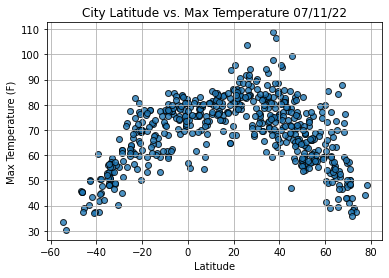

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

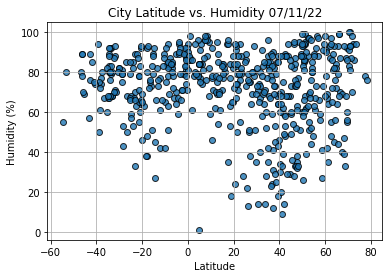

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.

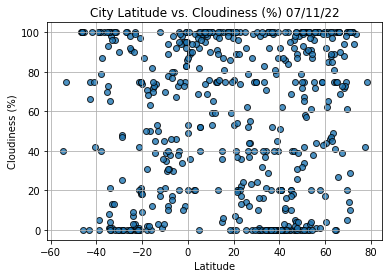

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

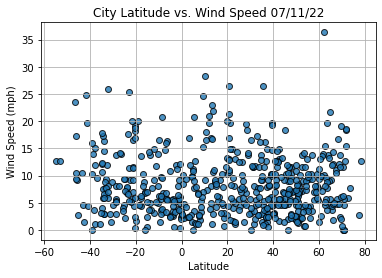

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()